Note: Picked k = 14 because it had the best balance between recall, precision, F1, and accuracy. Refer to results in final_optimal_weighted_k.py.

Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [ ]:
from pathlib import Path

# use absolute-safe path
project_root = Path.cwd().parent
csv_path = project_root / "data" / "output" / "tfidf_dataset.csv"

# load dataset
df = pd.read_csv(csv_path)

# define k value and number of folds
k_value = 14
fold = 5

# features and labels
X = df.drop(columns=["cyberbullying"])
y = df["cyberbullying"]

Reduce Dimensions + Train/Test Split

In [3]:
# dimensionality reduction using truncatedSVD
# reduces each word from 5000 to top 100 features that captures most of the info of the data
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)

Train Weighted KNN (k=14)

In [ ]:
# split training/testing data using kfold
kf = KFold(n_splits=fold, shuffle=True, random_state=42)
model = KNeighborsClassifier(n_neighbors=k_value, weights='distance')

# # collect all f1 and accuracy scores across all folds
# f1_scores = []
# acc_scores = []

# collect all true and predicted labels across all folds
all_y_true = []
all_y_pred = []

Results/Evaluation

In [5]:
for fold, (train_index, test_index) in enumerate(kf.split(X_reduced), start=1):
    X_train, X_test = X_reduced[train_index], X_reduced[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # acc = accuracy_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred, average='weighted')

    # acc_scores.append(acc)
    # f1_scores.append(f1)

    # print(f"Fold {fold}:")
    # print(f"Accuracy     = {acc:.4f}")
    # print(f"F1-Weighted  = {f1:.4f}")
    # print(classification_report(y_test, y_pred, digits=2))

    # # Confusion Matrix
    # cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(5, 4))
    # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not CB", "Cyberbullying"], yticklabels=["Not CB", "Cyberbullying"])
    # plt.title(f"Confusion Matrix - Fold {fold}")
    # plt.xlabel("Predicted")
    # plt.ylabel("Actual")
    # plt.tight_layout()
    # plt.show()

Overall Accuracy: 0.7845

Overall F1-Weighted Score: 0.7824
              precision    recall  f1-score   support

           0     0.7381    0.8818    0.8036     16225
           1     0.8533    0.6871    0.7613     16225

    accuracy                         0.7845     32450
   macro avg     0.7957    0.7845    0.7824     32450
weighted avg     0.7957    0.7845    0.7824     32450

Confusion Matrix:


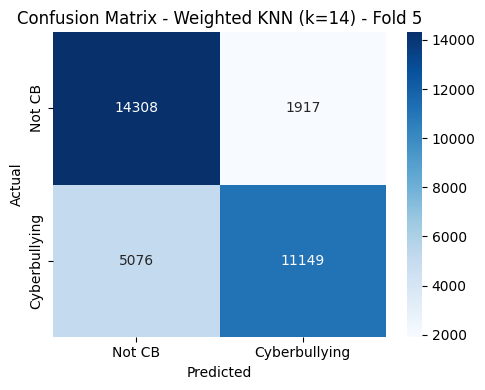

In [6]:
# Final evaluation over all folds combined
print(f"Overall Accuracy: {accuracy_score(all_y_true, all_y_pred):.4f}")
overall_f1 = f1_score(all_y_true, all_y_pred, average='weighted')
print(f"\nOverall F1-Weighted Score: {overall_f1:.4f}")
print(classification_report(all_y_true, all_y_pred, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not CB", "Cyberbullying"], yticklabels=["Not CB", "Cyberbullying"])
plt.title(f"Confusion Matrix - Weighted KNN (k={k_value}) - Fold {fold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()